In [1]:
import qrcode
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import display
from skimage import util
from skimage.filters import gaussian

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
import ipywidgets as widgets

%matplotlib inline

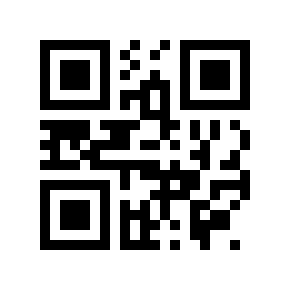

In [3]:
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data('安安')
qr.make(fit=True) # to avoid data overflow errors, fit=True 時決定最佳 version.

img = qr.make_image(fill_color="#000000", back_color="#FFFFFF")

#for i in range(3):
display(img)    

In [4]:
def _noise(mean):
    # ref: https://scikit-image.org/docs/dev/api/skimage.util.html#random-noise
    noise = util.random_noise(np.asarray(img),mode='gaussian',mean=mean) # output is [0~1] if usigned 'img'
    display(Image.fromarray(np.uint8(noise*255))) #Ip-only
    
# noise = util.random_noise(np.asarray(img),mode='speckle',mean=0.1)
interact(_noise,mean=(-1.2,1.5,0.01));

interactive(children=(FloatSlider(value=0.15000000000000013, description='mean', max=1.5, min=-1.2, step=0.01)…

# Salt & Pepper test

In [5]:
amount = FloatSlider(description="amount",
                   min=0, max=1, step=0.01, value=0.00)

# Higher values represent more salt
salt_vs_pepper = FloatSlider(description="s_vs_p",
                   min=0, max=1, step=0.01, value=0.5)

mode = widgets.Select(
    options=['salt','pepper','s&p'],
    value='s&p',
    rows=3,
    description='mode:',
    disabled=False
)

blur = FloatSlider(description="blur",
                   min=0, max=5, step=0.01, value=0.0)

gmean = FloatSlider(description="g_noise_mean",
                   min=0, max=1, step=0.01, value=0.0)

ui = widgets.VBox([mode,amount, salt_vs_pepper,blur,gmean])

def _f(mode, amount,blur,gmean,salt_vs_pepper):
    
    # 加入高斯雜訊
    g_noise = util.random_noise(np.asarray(img),mode='gaussian',mean=gmean) # output is [0~1] if usigned 'img'
    
    # 椒鹽雜訊
    sp_noise = util.random_noise(g_noise,salt_vs_pepper=salt_vs_pepper,mode=mode, amount=amount) 
    
    # 加入高斯模糊
    out = gaussian(sp_noise, sigma=blur, multichannel=True)
    
    display(Image.fromarray(np.uint8(out*255))) #Ip

out = widgets.interactive_output(_f, {'mode': mode, 'amount':amount, 'salt_vs_pepper':salt_vs_pepper,
                                      'blur':blur,'gmean':gmean})

display(ui, out)

Output()

# --------------------------------------------------------------------------------------------------------------

In [ ]:
# 光線影響
# 真實世界QRcode 的 destortion, perspective, croping
"""
0 Add noisy 加多少
1 lighting effect
2 distortion [eye fish(凸凸凹凹), perspective]
3 croping, partial corupption
1張 qr code 要做甚麼改變。

我們應該要用真實世界的 label 做 data augmentation

"""
# https://ieeexplore.ieee.org/abstract/document/4641935

# Generating Digital Painting Lighting Effects via RGB-space Geometry
# papper: https://lllyasviel.github.io/PaintingLight/files/TOG20PaintingLight.pdf
# DEMO: https://lllyasviel.github.io/PaintingLight/